In [2]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import dask.dataframe as dd
import random as rnd

In [3]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# System
import os

# 檢查檔案、路徑

In [5]:
# 檢查檔案是否存在
fname = '../Python code/train.csv'
os.path.exists(fname)

True

In [6]:
# 檢查檔案路徑+檔名
PATH = os.path.abspath(fname)
PATH

'C:\\Users\\user\\Python code\\train.csv'

In [7]:
# Read data by chunk for large dataset
fname = '../Python code/train.csv'
chunk_size=10**5
reader = pd.read_csv(fname, iterator=True)
chunks = []
loop = True
while loop:
    try:
        chunk = reader.get_chunk(chunk_size)
        chunks.append(chunk)
    except StopIteration:
        loop = False
        print("Iteration is stopped")

%time Raw_df = pd.concat(chunks, ignore_index=True)


# #read data for by dask fro large dataset
# fname = '../Python code/train_customer pattern.csv'
# %time Raw_df = dd.read_csv(fname)


# #read data for general dataset with pands
# fname = '../Python code/train_customer pattern.csv'
# %time Raw_df = pd.read_csv(fname)

Iteration is stopped
Wall time: 0 ns


# 檔案merge, Copy

In [ ]:
fname1 = ''
fname2 = ''
fname3 = ''
train_fr_1 = pd.read_csv(fname1)
train_fr_2 = pd.read_csv(fname2)
train_fr = pd.concat([train_fr_1, train_fr_2])
train_fr_new = train_fr[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
train_df = pd.read_csv(fname3)
train = pd.merge(train_df, train_fr_new, on = 'id', how = 'left')
train_df = train.copy()

# 檢查屬性是否唯一

In [ ]:
# checking if Ids are unique, 
start = time.time()
train_data = train_df.copy()
start = time.time()
print("Number of columns and rows and columns are {} and {} respectively.".format(train_data.shape[1], train_data.shape[0]))
if train_data.id.nunique() == train_data.shape[0]:
    print("Train ids are unique")
print("Number of Nulls - {}.".format(train_data.isnull().sum().sum()))
end = time.time()
print("Time taken by above cell is {}.".format(end-start))

In [8]:
# Analyze by describing data
print(Raw_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [9]:
# preview the data to check which are categorical/numerical
Raw_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 時間轉換

In [ ]:
import datetime as datetime
train_data = temp.copy()
train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime)
train_data.loc[:, 'pick_month'] = train_data['pickup_datetime'].dt.month
train_data.loc[:, 'hour'] = train_data['pickup_datetime'].dt.hour
train_data.loc[:, 'week_of_year'] = train_data['pickup_datetime'].dt.weekofyear
train_data.loc[:, 'day_of_year'] = train_data['pickup_datetime'].dt.dayofyear
train_data.loc[:, 'day_of_week'] = train_data['pickup_datetime'].dt.dayofweek


# Which features are mixed data types?

### Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

### Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

# Which features may contain errors or typos?

### This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

### Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [26]:
# Raw_df.info()
# print('_'*40)
# Raw_df.shape
# Raw_df.describe()
Q3 = Raw_df.PassengerId.quantile(0.75) #四分位
Q1 = Raw_df.PassengerId.quantile(0.25) #四分位
iqr = Q3-Q1
lower_bound = Q1-(iqr*1.5)
upper_bound = Q3+(iqr*1.5)
                           
Raw_df.loc[(Raw_df['PassengerId'] > upper_bound) | (Raw_df['PassengerId'] < lower_bound), 'Outlier'] = -1
Raw_df.loc[(Raw_df['PassengerId'] <= upper_bound) & (Raw_df['PassengerId'] >= lower_bound), 'Outlier'] = 1
Raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Outlier
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [21]:
# What is the distribution of numerical feature values across the samples?
Raw_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


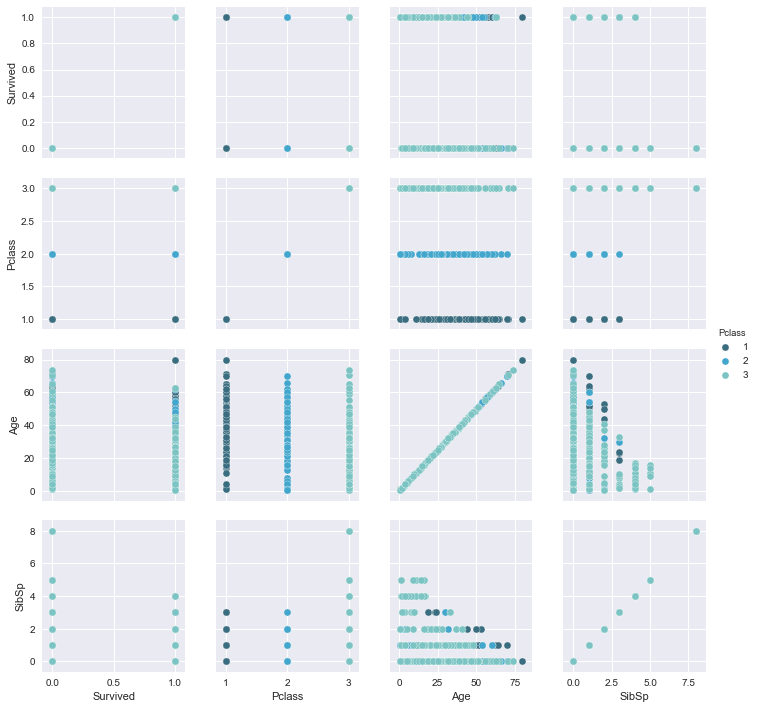

In [43]:
test_df = Raw_df[['Survived','Pclass','Age','SibSp']]
test_df
g = sns.PairGrid(test_df, hue="Pclass", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

In [59]:
# What is the distribution of categorical features?
# Raw_df.describe(include='all')
# Raw_df.describe(include=['category'])
Raw_df.describe(include=['O']) ####################################看TEXT型資料比方說ID是否有高重複性
Raw_df['Pclass'].unique()
(Raw_df.isnull().sum()/len(Raw_df)*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Outlier         0.000000
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

In [85]:
Raw_df.loc[Raw_df.Pclass[0:5],'Sex']
# Raw_df.set_index
# Raw_df.head()
Raw_df.index.name='item'
Raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Outlier
item,,,,,,,,,,,,,
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

# Correlating.

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

# Completing.

We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

# Correcting.

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

# Creating.

We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.

# Classifying.

We may also add to our assumptions based on the problem description noted earlier.

Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.

# 類別變數 - 分布以及影響力檢查

In [24]:
print(Raw_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [28]:
# Analyze by pivoting features for categorical or discret variables
Raw_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [34]:
Raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# Bar chart to check data distribution for categorical variables

# Raw_df.channelGrouping.value_counts().plot(kind="bar",title="channelGrouping distro",figsize=(8,8),rot=25,colormap='Paired')

# 數值變數 - 分布

In [38]:
print(Raw_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


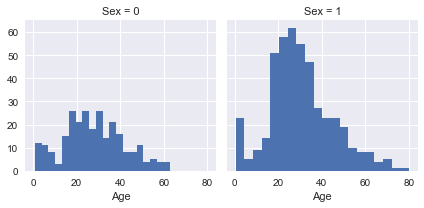

In [51]:
g = sns.FacetGrid(Raw_df, col='Sex')
g.map(plt.hist, 'Age', bins=20)

# Data Wrangle

In [ ]:
# drop column
Raw_df = Raw_df.drop(['col1', 'col2'], axis=1)


# drop rows


>Creating new feature extracting from existing

>1. Peter
>2. Ben
>3. Michael

- [x] Write the press release
- [ ] Update the website
- [ ] Contact the media


In [52]:
Raw_df.Name.head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [87]:
# Extract data from string type variables
Raw_df['Title'] = Raw_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# Raw_df[['Title','Sex']]


pd.crosstab(Raw_df['Title'], Raw_df['Pclass'])#

Pclass,1,2,3
Title,,,
Capt,1,0,0
Col,2,0,0
Countess,1,0,0
Don,1,0,0
Dr,5,2,0
Jonkheer,1,0,0
Lady,1,0,0
Major,2,0,0
Master,3,9,28


In [ ]:
# Regular expression 範例
df[['layout_bedroom', 'layout_livingroom', 'layout_bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛', expand=False)
df.head()

In [54]:
# Replacement

dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

Raw_df['Title'] = Raw_df['Title'].replace('Mlle', 'Miss')
Raw_df['Title'] = Raw_df['Title'].replace('Ms', 'Miss')
Raw_df['Title'] = Raw_df['Title'].replace('Mme', 'Mrs')
    
Raw_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

NameError: name 'dataset' is not defined

In [ ]:
# 類別型變數轉換為數值變數_1

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

Raw_df['Title'] = Raw_df['Title'].map(title_mapping)
Raw_df['Title'] = Raw_df['Title'].fillna(0)

Raw_df.head()

In [ ]:
# 類別型變數轉換為數值變數_2

Raw_df['Sex'] = Raw_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

In [ ]:
# 類別型變數轉換為數值變數_3
Raw_df['Embarked'] = Raw_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [ ]:
#數值型變數cut band_1 (先完成看分布)
Raw_df['AgeBand'] = pd.cut(Raw_df['Age'], 5)
Raw_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [ ]:
#數值型變數cut band_2 (根據分布定位準確CUT POINT)
Raw_df.loc[ Raw_df['Age'] <= 16, 'Age'] = 0
Raw_df.loc[(Raw_df['Age'] > 16) & (Raw_df['Age'] <= 32), 'Age'] = 1
Raw_df.loc[(Raw_df['Age'] > 32) & (Raw_df['Age'] <= 48), 'Age'] = 2
Raw_df.loc[(Raw_df['Age'] > 48) & (Raw_df['Age'] <= 64), 'Age'] = 3
Raw_df.loc[ Raw_df['Age'] > 64, 'Age']
Raw_df.head()

In [ ]:
# 數值型變數兩欄位相加減創造新欄位
Raw_df['FamilySize'] = Raw_df['SibSp'] + Raw_df['Parch'] + 1

Raw_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
# 數值型變數兩欄位相乘除創造新欄位
Raw_df['Age*Class'] = dataset.Age * dataset.Pclass
Raw_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

In [ ]:
# 有條件新創欄位值
Raw_df['IsAlone'] = 0
Raw_df.loc[Raw_df['FamilySize'] == 1, 'IsAlone'] = 1

Raw_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

In [ ]:
# 類別型變數空值填入
freq_port = train_df.Embarked.dropna().mode()[0]

Raw_df['Embarked'] = Raw_df['Embarked'].fillna(freq_port)
Raw_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
# 連續型變數空值填入 - 以中位數填入
Raw_df['Fare'].fillna(Raw_df['Fare'].dropna().median(), inplace=True)

# Corr

In [ ]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features 
X.drop(to_drop, axis=1, inplace=True)